In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("HR_comma_sep.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


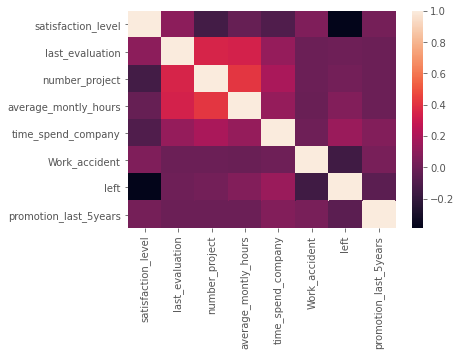

In [ ]:
sns.heatmap(corr)

Text(0.5, 0, 'Department')

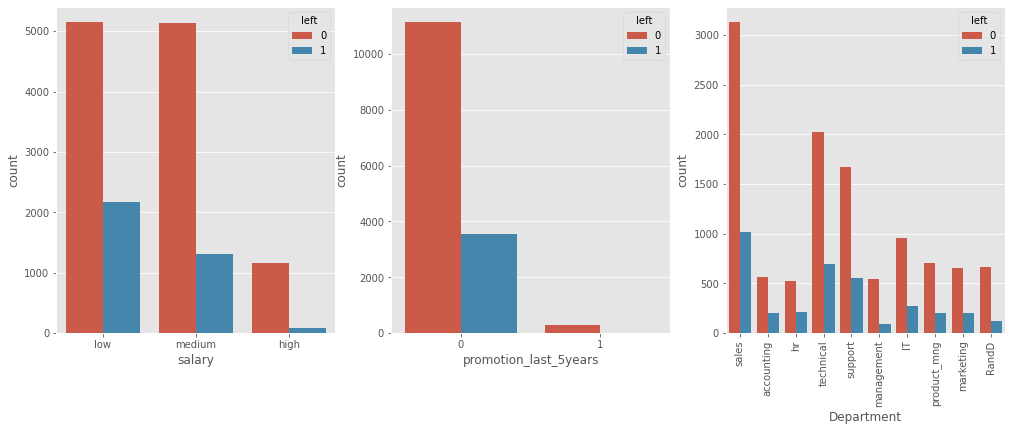

In [ ]:
f, axes = plt.subplots(ncols=3,figsize=(17,6))

sns.countplot(x='salary',hue='left',ax=axes[0],data=df)
sns.countplot(x='promotion_last_5years',hue='left',ax=axes[1],data=df)
sns.countplot(x='sales',hue='left',ax=axes[2],data=df)
plt.xticks(rotation=90)
plt.xlabel('Department')

Text(0.5, 1.0, 'Number of Years at the Company')

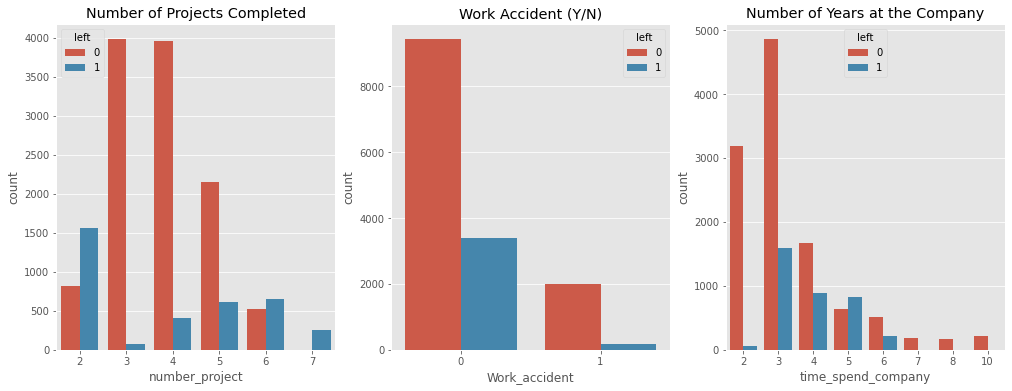

In [ ]:
f, axes = plt.subplots(ncols=3,figsize=(17,6))

a0 = sns.countplot(x='number_project',hue='left',ax=axes[0],data=df)
a0.set_title('Number of Projects Completed')
a1 = sns.countplot(x='Work_accident',hue='left',ax=axes[1],data=df)
a1.set_title('Work Accident (Y/N)')
a2 = sns.countplot(x='time_spend_company',hue='left',ax=axes[2],data=df)
a2.set_title('Number of Years at the Company')

Text(0.5, 1.0, 'Satisfaction Level in Each Department')

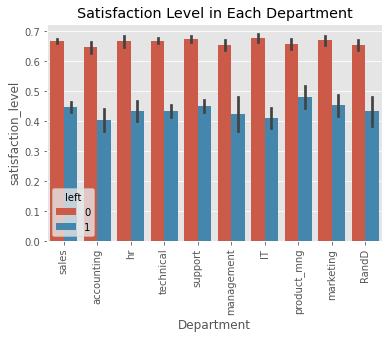

In [ ]:
sns.barplot(x='sales',y='satisfaction_level',hue='left',data=df)
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.title('Satisfaction Level in Each Department')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


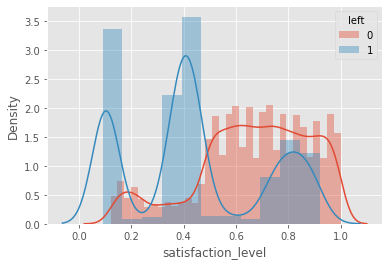

In [ ]:
left_yes = df[df['left'] == 1]
left_no = df[df['left'] == 0]
sns.distplot(left_no.satisfaction_level,label='0')
sns.distplot(left_yes.satisfaction_level,label='1')
plt.legend(title='left',loc='best')

Text(0.5, 1.0, 'Average hours clocked by employees in each department')

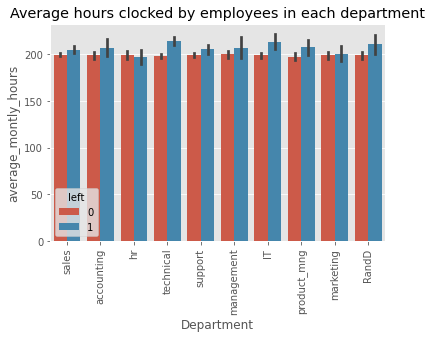

In [ ]:
sns.barplot(x='sales',y='average_montly_hours',hue='left',data=df)
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.title('Average hours clocked by employees in each department')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


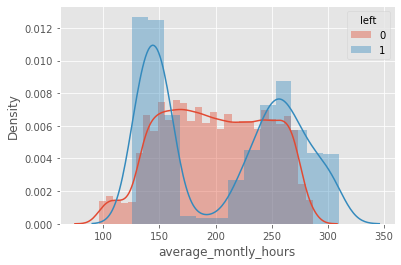

In [ ]:
sns.distplot(left_no.average_montly_hours,label='0')
sns.distplot(left_yes.average_montly_hours,label='1')
plt.legend(title='left',loc='best')

Text(0.5, 1.0, 'Last evaluation')

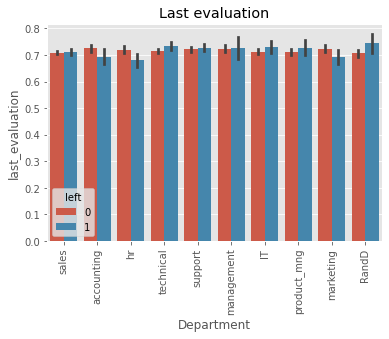

In [ ]:
sns.barplot(x='sales',y='last_evaluation',hue='left',data=df)
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.title('Last evaluation')

In [ ]:
lst = ['sales','technical','support','IT','product_mng','marketing','RandD','accounting','hr','management']

for i, pos in enumerate(lst):
    df.sales.replace(to_replace=pos,value=i,inplace=True)

In [ ]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
lst = ['low','medium','high']

for i, sal in enumerate(lst):
    df.salary.replace(to_replace=sal,value=i,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
x = df.drop('left',axis=1)
y = df.left
y.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_dev,x_test,y_dev,y_test = train_test_split(x_test,y_test,test_size=0.5)

In [ ]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_dev = scaler.transform(x_dev)
x_test = scaler.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(min_samples_split=3,)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8043
           1       1.00      0.99      1.00      2456

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499

Training accuracy: 0.998


In [ ]:
pred = clf.predict(x_dev)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

Dev set Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1716
           1       0.96      0.97      0.96       534

    accuracy                           0.98      2250
   macro avg       0.97      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250

Dev set accuracy: 0.983
AUC: 0.979


In [ ]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8043
           1       1.00      1.00      1.00      2456

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499

Training accuracy: 1.000


In [ ]:
pred = clf.predict(x_dev)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

Dev set Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1716
           1       1.00      0.97      0.98       534

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250

Dev set accuracy: 0.992
AUC: 0.985


In [ ]:
clf = SVC(C=500)
clf.fit(x_train,y_train)
pred = clf.predict(x_train)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8043
           1       0.98      0.98      0.98      2456

    accuracy                           0.99     10499
   macro avg       0.99      0.99      0.99     10499
weighted avg       0.99      0.99      0.99     10499

Training accuracy: 0.990


In [ ]:
pred = clf.predict(x_dev)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

Dev set Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1716
           1       0.94      0.95      0.94       534

    accuracy                           0.97      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.97      0.97      0.97      2250

Dev set accuracy: 0.972
AUC: 0.964


In [ ]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = clf.predict(x_test)
print('Test set Report\n {}'.format(classification_report(y_test,pred)))
print('Test set accuracy: {:.3f}'.format(accuracy_score(y_test,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_test,pred)))

Test set Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1669
           1       1.00      0.95      0.97       581

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

Test set accuracy: 0.987
AUC: 0.975
